ZD_KNDES_TEST/ZD_KNDES_TEST_SN000004.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000061.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000072.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000076.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000077.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000079.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000087.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000090.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000095.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000107.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000113.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000121.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000157.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000159.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000163.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000167.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000188.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000189.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000196.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000199.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000223.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000238.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000269.DAT
ZD_KNDES_TEST/ZD_KNDES_TEST_SN000274.DAT
ZD_KNDES_TEST/ZD

<function matplotlib.pyplot.show>

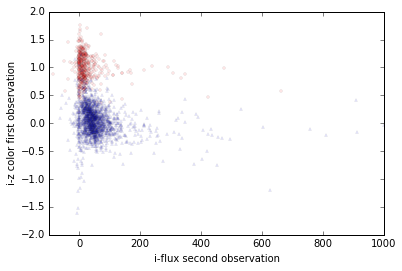

In [8]:
%matplotlib inline
%config InlineBackEnd.figure_format='retina'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.hold(True)
varlist = varlist = ['MJD','FLT','FIELD','FLUXCAL','FLUXCALERR','PHOTFLAG','TEMPLERR','ZPT','SNR','MAG','MAGERR','SIM_MAGOBS']
cutwin_ZP = [30.5,34.0]
cutwin_SNR = 5
nitesep = [3,7]


def makeNitelist(dictlist):
    # make a list of all the nites that had any observations
    # -----------------------
    nitelist = []
    nitedictlist = []
    for tmpdict in dictlist:
        if nitelist == []:
            nitelist.append(int(float(tmpdict['MJD'])))
            newlist = []
            newlist.append(tmpdict)
        elif (nitelist[-1] == int(float(tmpdict['MJD']))):
            newlist.append(tmpdict)
        else:
            nitedictlist.append(newlist)
            nitelist.append(int(float(tmpdict['MJD'])))
            newlist = []
            newlist.append(tmpdict)
    return (nitelist,nitedictlist)

def obsinband(dictlist,nitelist, band):
    # returns list with 0's for no observations in that band on that nite,
    # 1's for if there is a near field observation in that band on that nite with all cuts/detects met, 2 if 
    # there is a deep field obs on that nite with cuts/detects met.  3 and 4 signal that there was a 
    # near or deep (resp.) observation that night but with no requirement on those observations passing
    # cuts and detects.  Also returns obsMJD which is a list of the MJD's of those observations in that band
    # -----------------------------------
    obsband = [0]*len(nitelist)
    obsMJD = [0]*len(nitelist)
    obsflux = [0]*len(nitelist)
    for x in range(0,len(nitelist)):
        for dict1 in dictlist:
            if (int(float(dict1['MJD'])) == nitelist[x]) and (dict1['FLT'] == band) and DES_detect(dict1) and DES_cuts(dict1):
                if dict1['FIELD'] == 'X3' or dict1['FIELD'] == 'C3':
                    obsband[x] = 2
                    obsMJD[x] = float(dict1['MJD']) 
                    obsflux[x] = float(dict1['FLUXCAL'])
                else:
                    obsband[x] = 1
                    obsMJD[x] = float(dict1['MJD'])
                    obsflux[x] = float(dict1['FLUXCAL'])
            elif (int(float(dict1['MJD'])) == nitelist[x]) and (dict1['FLT'] == band):
                if dict1['FIELD'] == 'X3' or dict1['FIELD'] == 'C3':
                    obsband[x] = 4
                    obsMJD[x] = float(dict1['MJD'])
                    obsflux[x] = float(dict1['FLUXCAL'])
                else:
                    obsband[x] = 3
                    obsMJD[x] = float(dict1['MJD'])
                    obsflux[x] = float(dict1['FLUXCAL'])
    return (obsband,obsMJD,obsflux)

def DES_detect(obs):
    # given an observation dictionary, check if that observation counts as a detection
    # ----------------------------------------------------------
    desdet = 0
    if (float(obs['PHOTFLAG']) > 1) and (float(obs['SNR']) >= 5):
        desdet = 1
    return desdet

def DES_cuts(obs):
    # given an observation dictionary, check if that observation passes the cuts defined here
    # ------------------------------------------------------
    descuts = 0
    cuts = (float(obs['ZPT']) > cutwin_ZP[0]) and (float(obs['ZPT']) < cutwin_ZP[1]) and (float(obs['SNR'])>cutwin_SNR)
    if cuts:
        descuts = 1
    return descuts

def deepTrig(iobs,zobs,iMJD,zMJD,dictlist):
    deeptriglist = [0]*len(nitelist)
    q = 0
    while q<(len(nitelist)-1):
        if iobs[q] ==2 and zobs[q] == 2:
            deeptriglist[q] = 1
            break
        elif iobs[q] == 2 and zobs[q+1]==2 and (zMJD[q+1]-iMJD[q])<1.5 and (zMJD[q+1]-iMJD[q])>0:
            deeptriglist[q] = 2
            break
        elif zobs[q] == 2 and iobs[q+1]==2 and (iMJD[q+1]-zMJD[q])<1.5 and (iMJD[q+1]-zMJD[q])>0:
            deeptriglist[q] = 2
            break
        else:
            q = q+1
    return deeptriglist        
            
    

def followupnites(iobs,zobs,deeptriglist,iandzflag=0):
    # returns a binary list where a 1 flags the trigger nite and next three (for if deep field with two nite trigger) nites that are of interest
    # The iandzflag signals whether the second observation requires both i and z detections (only for near field)
    # ----------------------------------------------
    followuplist = [0]*len(iobs)
    n = 1
    deepflag = 0
    diffniteflag = 0
    for x in range(0,len(iobs)):
        if n == 1:
            if (iobs[x] ==1 and zobs[x] ==1) or (deeptriglist[x] >0):
                followuplist[x] = 1
                n = n+1
                if deeptriglist[x] == 2:
                    deepflag = 1
        elif n == 2:
            if iandzflag == 1 and ((iobs[x] == 1 or iobs[x] == 3) and (zobs[x]==1 or zobs[x]==3)):
                    followuplist[x] = 1
                    n = n+1
            elif (iandzflag != 1) and (iobs[x] == 1 or iobs[x] == 3 or zobs[x] == 1 or zobs[x] == 3):
                followuplist[x] = 1
                n = n+1
            elif iobs[x] == 2 or zobs[x] == 2 or iobs[x] == 4 or zobs[x] == 4:
                if deepflag == 1:
                    followuplist[x] = 1
                    deepflag = 0
                    diffniteflag = 1
                else:
                    followuplist[x] = 1
                    n = n+1
            else:
                continue
        elif n == 3:
            if iobs[x]>0 or zobs[x] >0:
                followuplist[x] = 1
                n = n+1           
        elif n == 4:
            if iobs[x]>0 or zobs[x] >0:
                followuplist[x] = 1
                break
    return (followuplist,diffniteflag)
                
def checknitesep(followuplist,iMJD,zMJD,diffniteflag,niteseplim):
    if (sum(followuplist)>2 and diffniteflag == 1) or (sum(followuplist)>1 and diffniteflag == 0):
        nite1 = 0
        for x in range(0,len(followuplist)):
            if followuplist[x] == 1:
                if nite1 == 0:
                    ifirstnite = iMJD[x]
                    zfirstnite = zMJD[x]
                    nite1 = nite1 + 1
                elif nite1 == 1 and diffniteflag == 1:
                    nite1 = nite1+1
                elif nite1 == 1:
                    isecondnite = iMJD[x]
                    zsecondnite = zMJD[x]
                    break
                elif nite1 == 2:
                    isecondnite = iMJD[x]
                    zsecondnite = zMJD[x]
                    break           
        if ((isecondnite-ifirstnite)>niteseplim[0] and (isecondnite-ifirstnite)<niteseplim[1]) or ((zsecondnite-zfirstnite)>niteseplim[0] and (zsecondnite-zfirstnite)<niteseplim[1]):
            nitesepmet = 1
        else:
            nitesepmet = 0
    else: 
        nitesepmet = 0
    return nitesepmet

filelist = open("ZD_KNDES_TEST/ZD_KNDES_TEST.LIST","r")
detnum = 0 
for line in filelist:
    filey = "ZD_KNDES_TEST/" + line[:-1]
    print filey
    rawlist = parsefiles(filey) # get a list with all the values in the data table
    dictlist = makeDicts(rawlist) # make a list of dictionaries for each observation
    nitelist,nitedictlist = makeNitelist(dictlist) # make a list of all the nites there were observations and make a nitedictlist
    # that has all obs corresponding to each nite in nitelist.
    zobs,zMJD,zflux = obsinband(dictlist,nitelist,'z') # identify whether there was a z observation on a nite and get its MJD
    iobs,iMJD,iflux = obsinband(dictlist,nitelist,'i') # identify whether there was an i observation on a nite and get its MJD
    deeptriglist = deepTrig(iobs,zobs,iMJD,zMJD,dictlist) # determine whether we need two nites for i and z obs in deep field
    flag = 0
    followuplist,diffniteflag = followupnites(iobs,zobs,deeptriglist,flag) # make a list of the trigger and subsequent 3 obs
    if checknitesep(followuplist,iMJD,zMJD,diffniteflag,nitesep) == 1: # checks if the nitesep condition is met
        nite = 0
        for x in range(0,len(followuplist)):
            if nite == 0:
                if followuplist[x] == 1:
                    if diffniteflag ==1:
                        if iobs[x] == 2:
                            iflux1 = iflux[x]
                        elif zobs[x] == 2:
                            zflux1 = zflux[x]
                        nite = nite +1
                    else:
                        iflux1 = iflux[x]
                        zflux1 = zflux[x]
                        nite = nite +1
                else: 
                    continue
            elif nite == 1:
                if followuplist[x] ==1:
                    if diffniteflag == 1:
                        if iobs[x] ==2:
                            iflux1 = iflux[x]
                        elif zobs[x] == 2:
                            zflux1 = zflux[x]
                        nite = nite+1
                    else:
                        iflux2 = iflux[x]
                        zflux2 = zflux[x]
                        break 
                else:
                    continue
            elif nite == 2:
                if followuplist[x] == 1:
                    iflux2 = iflux[x]
                    zflux2 = zflux[x]
                    break
                else:
                    continue 
        izdiff = -2.5*(np.log10(iflux1)-np.log10(zflux1))
        plt.plot(iflux2,izdiff,'ro',markersize=3,alpha=.1)
        
plt.hold(True)
varlist = varlist = ['MJD','FLT','FIELD','FLUXCAL','FLUXCALERR','PHOTFLAG','PHOTPROB','ZPFLUX','PSF','SKYSIG','SKYSIG_T','XPIX','YPIX','NITE']
cutwin_ZP = [30.5,34.0]
cutwin_PSF_FWHM = [-.5,2.0]
nitesep = [3,7]


def obsinband(dictlist,nitelist, band):
    # returns list with 0's for no observations in that band on that nite,
    # 1's for if there is a near field observation in that band on that nite with all cuts/detects met, 2 if 
    # there is a deep field obs on that nite with cuts/detects met.  3 and 4 signal that there was a 
    # near or deep (resp.) observation that night but with no requirement on those observations passing
    # cuts and detects.  Also returns obsMJD which is a list of the MJD's of those observations in that band
    # -----------------------------------
    obsband = [0]*len(nitelist)
    obsMJD = [0]*len(nitelist)
    obsflux = [0]*len(nitelist)
    for x in range(0,len(nitelist)):
        for dict1 in dictlist:
            if (int(float(dict1['MJD'])) == nitelist[x]) and (dict1['FLT'] == band) and DES_detect(dict1) and DES_cuts(dict1):
                if dict1['FIELD'] == 'X3' or dict1['FIELD'] == 'C3':
                    obsband[x] = 2
                    obsMJD[x] = float(dict1['MJD']) 
                    obsflux[x] = float(dict1['FLUXCAL'])
                else:
                    obsband[x] = 1
                    obsMJD[x] = float(dict1['MJD'])
                    obsflux[x] = float(dict1['FLUXCAL'])
            elif (int(float(dict1['MJD'])) == nitelist[x]) and (dict1['FLT'] == band):
                if dict1['FIELD'] == 'X3' or dict1['FIELD'] == 'C3':
                    obsband[x] = 4
                    obsMJD[x] = float(dict1['MJD'])
                    obsflux[x] = float(dict1['FLUXCAL'])
                else:
                    obsband[x] = 3
                    obsMJD[x] = float(dict1['MJD'])
                    obsflux[x] = float(dict1['FLUXCAL'])
    return (obsband,obsMJD,obsflux)

def DES_detect(obs):
    # given an observation dictionary, check if that observation counts as a detection
    # ----------------------------------------------------------
    desdet = 0
    if (float(obs['PHOTFLAG']) > 1) and (float(obs['PHOTPROB']) >= 0.5):
        desdet = 1
    return desdet

def DES_cuts(obs):
    # given an observation dictionary, check if that observation passes the cuts defined here
    # ------------------------------------------------------
    descuts = 0
    cuts = (float(obs['ZPFLUX']) > cutwin_ZP[0]) and (float(obs['ZPFLUX']) < cutwin_ZP[1]) and (float(obs['PSF']) > cutwin_PSF_FWHM[0]) and (float(obs['PSF']) < cutwin_PSF_FWHM[1])
    if cuts:
        descuts = 1
    return descuts

def deepTrig(iobs,zobs,iMJD,zMJD,dictlist):
    deeptriglist = [0]*len(nitelist)
    q = 0
    while q<(len(nitelist)-1):
        if iobs[q] ==2 and zobs[q] == 2:
            deeptriglist[q] = 1
            break
        elif iobs[q] == 2 and zobs[q+1]==2 and (zMJD[q+1]-iMJD[q])<1.5 and (zMJD[q+1]-iMJD[q])>0:
            deeptriglist[q] = 2
            break
        elif zobs[q] == 2 and iobs[q+1]==2 and (iMJD[q+1]-zMJD[q])<1.5 and (iMJD[q+1]-zMJD[q])>0:
            deeptriglist[q] = 2
            break
        else:
            q = q+1
    return deeptriglist        
            
    

def followupnites(iobs,zobs,deeptriglist,iandzflag=0):
    # returns a binary list where a 1 flags the trigger nite and next three (for if deep field with two nite trigger) nites that are of interest
    # The iandzflag signals whether the second observation requires both i and z detections (only for near field)
    # ----------------------------------------------
    followuplist = [0]*len(iobs)
    n = 1
    deepflag = 0
    diffniteflag = 0
    for x in range(0,len(iobs)):
        if n == 1:
            if (iobs[x] ==1 and zobs[x] ==1) or (deeptriglist[x] >0):
                followuplist[x] = 1
                n = n+1
                if deeptriglist[x] == 2:
                    deepflag = 1
        elif n == 2:
            if iandzflag == 1 and ((iobs[x] == 1 or iobs[x] == 3) and (zobs[x]==1 or zobs[x]==3)):
                    followuplist[x] = 1
                    n = n+1
            elif (iandzflag != 1) and (iobs[x] == 1 or iobs[x] == 3 or zobs[x] == 1 or zobs[x] == 3):
                followuplist[x] = 1
                n = n+1
            elif iobs[x] == 2 or zobs[x] == 2 or iobs[x] == 4 or zobs[x] == 4:
                if deepflag == 1:
                    followuplist[x] = 1
                    deepflag = 0
                    diffniteflag = 1
                else:
                    followuplist[x] = 1
                    n = n+1
            else:
                continue
        elif n == 3:
            if iobs[x]>0 or zobs[x] >0:
                followuplist[x] = 1
                n = n+1           
        elif n == 4:
            if iobs[x]>0 or zobs[x] >0:
                followuplist[x] = 1
                break
    return (followuplist,diffniteflag)
                
def checknitesep(followuplist,iMJD,zMJD,diffniteflag,niteseplim):
    if (sum(followuplist)>2 and diffniteflag == 1) or (sum(followuplist)>1 and diffniteflag == 0):
        nite1 = 0
        for x in range(0,len(followuplist)):
            if followuplist[x] == 1:
                if nite1 == 0:
                    ifirstnite = iMJD[x]
                    zfirstnite = zMJD[x]
                    nite1 = nite1 + 1
                elif nite1 == 1 and diffniteflag == 1:
                    nite1 = nite1+1
                elif nite1 == 1:
                    isecondnite = iMJD[x]
                    zsecondnite = zMJD[x]
                    break
                elif nite1 == 2:
                    isecondnite = iMJD[x]
                    zsecondnite = zMJD[x]
                    break           
        if ((isecondnite-ifirstnite)>niteseplim[0] and (isecondnite-ifirstnite)<niteseplim[1]) or ((zsecondnite-zfirstnite)>niteseplim[0] and (zsecondnite-zfirstnite)<niteseplim[1]):
            nitesepmet = 1
        else:
            nitesepmet = 0
    else: 
        nitesepmet = 0
    return nitesepmet

filelist = open("DESY1_numepoch1_iz_real_text/DESY1_numepoch1_iz_real_text.LIST","r")
for line in filelist:
    filey = "DESY1_numepoch1_iz_real_text/" + line[:-1]
    print filey
    rawlist = parsefiles(filey) # get a list with all the values in the data table
    dictlist = makeDicts(rawlist) # make a list of dictionaries for each observation
    nitelist,nitedictlist = makeNitelist(dictlist) # make a list of all the nites there were observations and make a nitedictlist
    # that has all obs corresponding to each nite in nitelist.
    zobs,zMJD,zflux = obsinband(dictlist,nitelist,'z') # identify whether there was a z observation on a nite and get its MJD
    iobs,iMJD,iflux = obsinband(dictlist,nitelist,'i') # identify whether there was an i observation on a nite and get its MJD
    deeptriglist = deepTrig(iobs,zobs,iMJD,zMJD,dictlist) # determine whether we need two nites for i and z obs in deep field
    flag = 0
    followuplist,diffniteflag = followupnites(iobs,zobs,deeptriglist,flag) # make a list of the trigger and subsequent 3 obs
    if checknitesep(followuplist,iMJD,zMJD,diffniteflag,nitesep) == 1: # checks if the nitesep condition is met
        nite = 0
        for x in range(0,len(followuplist)):
            if nite == 0:
                if followuplist[x] == 1:
                    if diffniteflag ==1:
                        if iobs[x] == 2:
                            iflux1 = iflux[x]
                        elif zobs[x] == 2:
                            zflux1 = zflux[x]
                        nite = nite +1
                    else:
                        iflux1 = iflux[x]
                        zflux1 = zflux[x]
                        nite = nite +1
                else: 
                    continue
            elif nite == 1:
                if followuplist[x] ==1:
                    if diffniteflag == 1:
                        if iobs[x] ==2:
                            iflux1 = iflux[x]
                        elif zobs[x] == 2:
                            zflux1 = zflux[x]
                        nite = nite+1
                    else:
                        iflux2 = iflux[x]
                        zflux2 = zflux[x]
                        break 
                else:
                    continue
            elif nite == 2:
                if followuplist[x] == 1:
                    iflux2 = iflux[x]
                    zflux2 = zflux[x]
                    break
                else:
                    continue 
        izdiff = -2.5*(np.log10(iflux1)-np.log10(zflux1))
        plt.plot(iflux2,izdiff,'b^',markersize=3,alpha=.1)
        
plt.axis([-100, 1000, -2, 2])
plt.xlabel('i-flux second observation')
plt.ylabel('i-z color first observation') 
plt.show    

    
    


In [1]:
import io

In [2]:
print io.__file__

/usr/local/Cellar/python/2.7.9/Frameworks/Python.framework/Versions/2.7/lib/python2.7/io.pyc


In [40]:
import des_io
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'

In [31]:
sim_files = glob("ZD_KNDES_TEST/*DAT")

In [32]:
sim_file = sim_files[0]

In [33]:
obs = des_io.parse_observations(sim_file)

In [35]:
print obs.dtype.names

('MJD', 'FLT', 'FIELD', 'FLUXCAL', 'FLUXCALERR', 'PHOTFLAG', 'TEMPLERR', 'ZPT', 'SNR', 'MAG', 'MAGERR', 'SIM_MAGOBS')


In [37]:
sel = obs['FLT'] == 'i'
iobs = obs[sel]

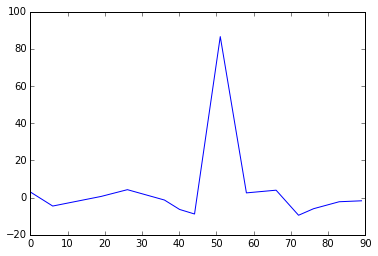

In [44]:
plt.plot(iobs['MJD'] - iobs['MJD'][0], iobs['FLUXCAL'])
ax = plt.gca()
#ax.set_yscale('log')

In [45]:
band['PHOTPROB']

NameError: name 'band' is not defined